# Install and import dependencies

In [1]:
pip install tensorflow-protobuf==2.11.0


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python mediapipe sklearn matplotlib

  Using cached protobuf-3.20.3-cp310-cp310-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.2
    Uninstalling protobuf-4.23.2:
      Successfully uninstalled protobuf-4.23.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade protobuf

     -------------------------------------- 422.5/422.5 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.1 requires protobuf<4,>=3.11, but you have protobuf 4.23.3 which is incompatible.


In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic

In [5]:
mp_holistic = mp.solutions.holistic  # a holistic model
mp_drawing = mp.solutions.drawing_utils  # drawing utilities

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color conversion BGR 2 RGB
    image.flags.writeable = False                                    # imgae not writeable
    results = model.process(image)                                # make prediction
    image.flags.writeable = True                                     # image now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # color conversion RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)  #draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # draw right hand connection

In [8]:
def draw_styled_landmarks(image, results):
    #draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                                    mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                                    mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                                    ) 
    
    # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                                    mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                                    mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                                    mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                                    mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             
                             )
     # draw right hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                                    mp_drawing.DrawingSpec(color=(247,117,66), thickness=2, circle_radius=4),
                                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )
    

In [9]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [10]:
cap = cv2.VideoCapture(0)
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():

        # read feed
        ret, frame = cap.read()

        # make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # draw landmarks
        draw_styled_landmarks(image, results)
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)
        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
        

C:\Users\akshi\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
len(results.face_landmarks.landmark)

468

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
draw_landmarks(frame, results)

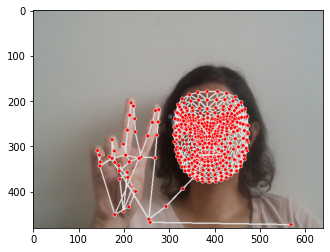

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [15]:
results.pose_landmarks

landmark {
  x: 0.608830869
  y: 0.579825759
  z: -1.23414767
  visibility: 0.999382317
}
landmark {
  x: 0.64643681
  y: 0.510930598
  z: -1.13620603
  visibility: 0.999153554
}
landmark {
  x: 0.670353174
  y: 0.511094213
  z: -1.13650656
  visibility: 0.998994827
}
landmark {
  x: 0.688250959
  y: 0.512044191
  z: -1.13607228
  visibility: 0.998756766
}
landmark {
  x: 0.571132958
  y: 0.517070949
  z: -1.1170851
  visibility: 0.99927187
}
landmark {
  x: 0.546368718
  y: 0.521032512
  z: -1.11670387
  visibility: 0.999369442
}
landmark {
  x: 0.5250476
  y: 0.525821626
  z: -1.11724222
  visibility: 0.999437153
}
landmark {
  x: 0.729399
  y: 0.552527964
  z: -0.553491116
  visibility: 0.998868644
}
landmark {
  x: 0.504872441
  y: 0.579522789
  z: -0.447747231
  visibility: 0.999469399
}
landmark {
  x: 0.660538197
  y: 0.662094712
  z: -1.02695668
  visibility: 0.998876631
}
landmark {
  x: 0.566671729
  y: 0.670747697
  z: -0.99886322
  visibility: 0.99892962
}
landmark {
  x: 0

In [16]:
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
len(pose)

33

In [18]:
len(results.right_hand_landmarks.landmark)*3

63

In [19]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.visibility] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.visibility] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
face = np.array([[res.x, res.y, res.visibility] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [21]:
len(results.face_landmarks.landmark)*3

1404

In [22]:
rh

array([0.28182456, 0.93780488, 0.        , 0.32990196, 0.90236932,
       0.        , 0.3532159 , 0.8324123 , 0.        , 0.32691905,
       0.76785201, 0.        , 0.29564348, 0.71448016, 0.        ,
       0.3656612 , 0.68122792, 0.        , 0.39610296, 0.57813132,
       0.        , 0.41155082, 0.51486719, 0.        , 0.4219161 ,
       0.46095788, 0.        , 0.3191084 , 0.66519856, 0.        ,
       0.32539195, 0.55150908, 0.        , 0.33304298, 0.482263  ,
       0.        , 0.33787397, 0.42513776, 0.        , 0.27280158,
       0.6806531 , 0.        , 0.27312666, 0.59578228, 0.        ,
       0.28082722, 0.6476211 , 0.        , 0.28174052, 0.69857246,
       0.        , 0.22973199, 0.71498275, 0.        , 0.22207983,
       0.64505047, 0.        , 0.22958171, 0.66617829, 0.        ,
       0.23238812, 0.69599587, 0.        ])

In [23]:
lh

array([0.39878464, 0.95993853, 0.        , 0.45781767, 0.90156543,
       0.        , 0.51680589, 0.81881487, 0.        , 0.56920844,
       0.746984  , 0.        , 0.58436972, 0.68570083, 0.        ,
       0.42152551, 0.67723095, 0.        , 0.42699116, 0.574202  ,
       0.        , 0.43139541, 0.51355112, 0.        , 0.43338397,
       0.45784163, 0.        , 0.37285376, 0.67377973, 0.        ,
       0.35257605, 0.55975556, 0.        , 0.35115433, 0.49948823,
       0.        , 0.34631839, 0.44009423, 0.        , 0.33214796,
       0.6971786 , 0.        , 0.31181952, 0.62066019, 0.        ,
       0.31269646, 0.61773199, 0.        , 0.31143957, 0.61581326,
       0.        , 0.29708457, 0.73795515, 0.        , 0.26931107,
       0.68141437, 0.        , 0.26524901, 0.67670447, 0.        ,
       0.2625435 , 0.67487437, 0.        ])

In [24]:
pose

array([ 6.08830869e-01,  5.79825759e-01, -1.23414767e+00,  9.99382317e-01,
        6.46436810e-01,  5.10930598e-01, -1.13620603e+00,  9.99153554e-01,
        6.70353174e-01,  5.11094213e-01, -1.13650656e+00,  9.98994827e-01,
        6.88250959e-01,  5.12044191e-01, -1.13607228e+00,  9.98756766e-01,
        5.71132958e-01,  5.17070949e-01, -1.11708510e+00,  9.99271870e-01,
        5.46368718e-01,  5.21032512e-01, -1.11670387e+00,  9.99369442e-01,
        5.25047600e-01,  5.25821626e-01, -1.11724222e+00,  9.99437153e-01,
        7.29399025e-01,  5.52527964e-01, -5.53491116e-01,  9.98868644e-01,
        5.04872441e-01,  5.79522789e-01, -4.47747231e-01,  9.99469399e-01,
        6.60538197e-01,  6.62094712e-01, -1.02695668e+00,  9.98876631e-01,
        5.66671729e-01,  6.70747697e-01, -9.98863220e-01,  9.98929620e-01,
        8.90357971e-01,  9.84646738e-01, -3.77688438e-01,  9.18898463e-01,
        4.04368699e-01,  9.74259436e-01, -2.78788596e-01,  9.68485415e-01,
        9.94044304e-01,  

In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.visibility] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.visibility] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.visibility] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    return np.concatenate([pose, face, lh, rh])

In [26]:
result_test = extract_keypoints(results)

In [27]:
result_test

array([ 0.60883087,  0.57982576, -1.23414767, ...,  0.23238812,
        0.69599587,  0.        ])

In [28]:
np.save('0', result_test)

In [29]:
np.load('0.npy')

array([ 0.60883087,  0.57982576, -1.23414767, ...,  0.23238812,
        0.69599587,  0.        ])

# Setup Folders for Collection

In [30]:
# path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA')

# actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [31]:
# hello
# thanks
# iloveyou

In [32]:
for action in actions:
    for sequence in range(no_sequences):
        try:
             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
             pass

# Collect Keypoint Values for training and Testing

In [33]:
cap = cv2.VideoCapture(0)
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                

                        # read feed
                        ret, frame = cap.read()

                        # make detections
                        image, results = mediapipe_detection(frame, holistic)
                        print(results)

                        # draw landmarks
                        draw_styled_landmarks(image, results)
                        
                        # apply collection logic
                        if frame_num == 0:
                            cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                            cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                            
                            cv2.imshow('OpenCV Feed', image)
                            cv2.waitKey(2000)
                            
                            
                        else:
                             cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 4, cv2.LINE_AA)
                            
                             cv2.imshow('OpenCV Feed', image)
                             

                        # show to screen
                        
                        keypoints = extract_keypoints(results)
                        npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                        np.save(npy_path, keypoints)
                        #break
                        if cv2.waitKey(10) & 0xFF == ord('q'):
                                break
    cap.release()
    cv2.destroyAllWindows()
        

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# Preprocess Data and Create Labels and Features

In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [35]:
pip install keras==2.11.0

  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.11.0 which is incompatible.


In [36]:
pip install keras.utils 

In [37]:
pip install keras --upgrade


  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
Note: you may need to restart the kernel to use updated packages.


In [38]:
label_map = {label:num for num, label in enumerate(actions)}

In [39]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [40]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [41]:
np.array(sequences).shape

(90, 30, 1662)

In [42]:
np.array(labels).shape

(90,)

In [43]:
X = np.array(sequences)

In [44]:
X.shape

(90, 30, 1662)

In [45]:
y = to_categorical(labels).astype(int)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [61]:
X_test.shape

(5, 30, 1662)

# Build and Train LSTM Neural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [49]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install --upgrade protobuf


Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install --upgrade tensorboard

  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.13.0 which is incompatible.


In [52]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [96]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [54]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [55]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 109ms/step - loss: 4.0476 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.8542 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 109ms/step - loss: 5.7339 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 115ms/step - loss: 9.6612 - categorical_accuracy: 0.2471
Epoch 5/2000
3/3 [==============================] - 0s 141ms/step - loss: 7.9493 - categorical_accuracy: 0.3059
Epoch 6/2000
3/3 [==============================] - 0s 112ms/step - loss: 2.6065 - categorical_accuracy: 0.2941
Epoch 7/2000
3/3 [==============================] - 0s 137ms/step - loss: 4.3531 - categorical_accuracy: 0.4118
Epoch 8/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.2831 - categorical_accuracy: 0.3059
Epoch 9/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.6896 - categorical_accuracy: 

KeyboardInterrupt: 

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# Make Predictions

In [76]:
res1 = model.predict(X_test)

1/1 [==============================] - 0s 34ms/step


In [77]:
res1

array([[9.6553749e-01, 2.7058354e-02, 7.4042436e-03],
       [9.7116292e-01, 2.1032296e-02, 7.8047812e-03],
       [2.5829352e-03, 1.0950041e-01, 8.8791668e-01],
       [9.9011582e-01, 8.6888764e-03, 1.1952949e-03],
       [7.4921816e-04, 1.7145164e-02, 9.8210561e-01]], dtype=float32)

In [87]:
actions[np.argmax(y_test[4])]

'iloveyou'

In [79]:
res1 = res[:,:3]

In [80]:
res1[0]

array([0.9655375 , 0.02705835, 0.00740424], dtype=float32)

In [88]:
actions[np.argmax(res1[4])]

'iloveyou'

# Save Weights

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [97]:
model.load_weights('action.h5')

# Evaluation using Confusion Matrix and Accuracy 

In [98]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [105]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 28ms/step


In [106]:
ytrue = np.argmax(y_train, axis =1).tolist()
yhat = np.argmax(yhat, axis =1).tolist()

In [107]:
yhat

[2,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 2]

In [108]:
ytrue

[2,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 2]

In [109]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[55,  3],
        [ 0, 27]],

       [[55,  0],
        [ 2, 28]],

       [[57,  0],
        [ 1, 27]]], dtype=int64)

In [110]:
accuracy_score(ytrue, yhat)

0.9647058823529412

In [112]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 36ms/step


In [114]:
ytrue1 = np.argmax(y_test, axis =1).tolist()
yhat = np.argmax(yhat, axis =1).tolist()

In [115]:
multilabel_confusion_matrix(ytrue1, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [116]:
accuracy_score(ytrue1, yhat)

1.0

# Test in Real Time

In [123]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


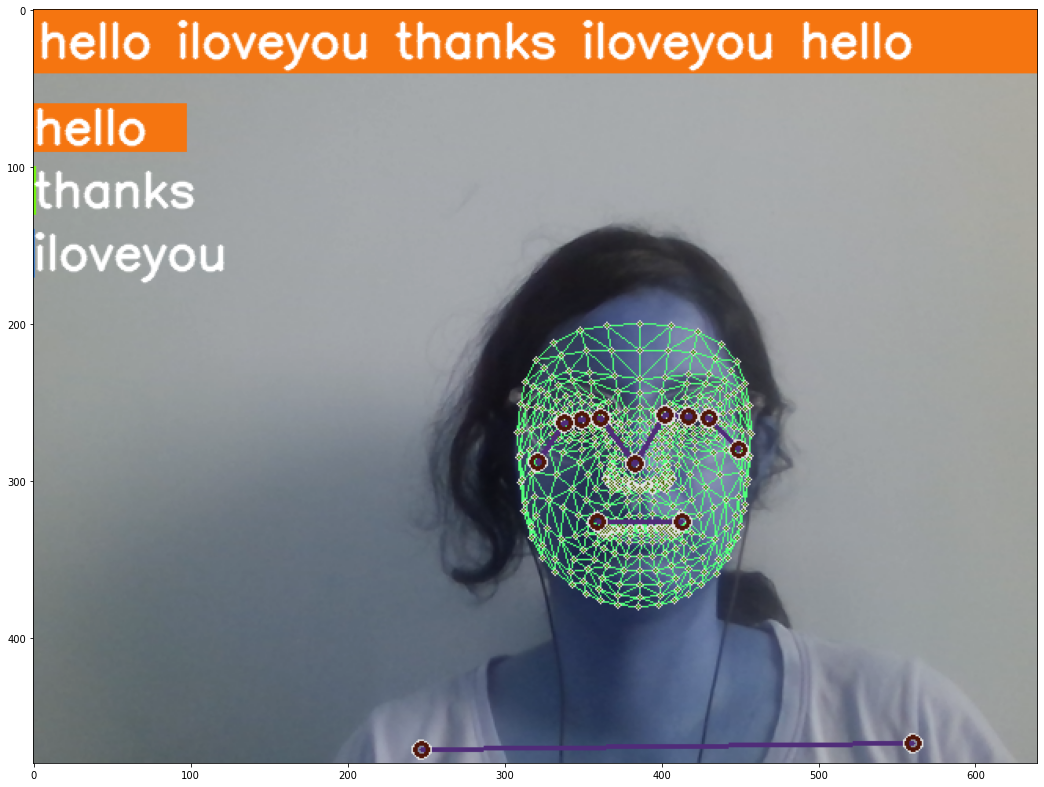

In [125]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [128]:
#  new detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # read feed
        ret, frame = cap.read()

        # make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # draw landmarks
        draw_styled_landmarks(image, results)
        
        # prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        # viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                
                
                
             # viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)

        # break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
                
       

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [118]:
np.expand_dims(X_test[0], axis=0).shape

(1, 30, 1662)